In [ ]:
import matplotlib.pyplot as plt

import random
random.seed(None)

In [ ]:
class Bandit:
    def __init__(self, N) -> None:
        self.N = N
        self.reward = [1] * N

    def binaryBanditA(self, A) -> int:
        p = [0.1,0.2] # Rewards distribution
        if random.random() < p[A]:
            return 1
        else:
            return 0

    def binaryBanditB(self, A) -> int:
        p = [0.8,0.9] # Rewards distribution
        if random.random() < p[A]:
            return 1
        else:
            return 0

    def nonStatBandit(self, A) -> float:
        # add a normally distributed increment with mean 0 and
        # standard deviation 0.01 to all mean-rewards on each time step
        for i, _ in enumerate(self.reward):
            self.reward[i] = self.reward[i] + random.gauss(0, 0.01)

        return self.reward[A]

In [ ]:
class EpsilonGreedyAgent:
    def __init__(self, epsilon, arms, bandit) -> None:
        self.epsilon = epsilon
        self.arms = arms # Number of arms
        self.bandit = bandit

    def epsilon_greedy(self):
        N = [0] * self.arms
        Q = [0] * self.arms
        AvgRewards = [0]
        for iter in range(1, 1000):
            if random.random() <= self.epsilon:
                A = max((q, a) for a, q in enumerate(Q))[1]
            else:
                A = random.randrange(0,self.arms)

            R = self.bandit(A)
            AvgR = AvgRewards[iter-1] + (R - AvgRewards[iter-1])/iter
            AvgRewards.append(AvgR)

            N[A] = N[A]+1
            Q[A] = Q[A] + (1/N[A]) * (R - Q[A])

        return Q, AvgRewards

    def modified_epsilon_greedy(self, alpha):
        Q = [0] * self.arms
        AvgRewards = [0]
        for iter in range(1, 1000):
            if random.random() <= self.epsilon:
                A = max((q, a) for a, q in enumerate(Q))[1]
            else:
                A = random.randrange(0,self.arms)

            R = self.bandit(A)
            AvgR = AvgRewards[iter-1] + (R - AvgRewards[iter-1])/iter
            AvgRewards.append(AvgR)

            Q[A] = Q[A] + alpha * (R - Q[A])

        return Q, AvgRewards

# **Problem 1**

1. **For binaryBanditA**

Estimated action values (Qt(a)):
[0.09447004608294925, 0.21061946902654863]
Average rewards recieved:
[0, 0.0, 0.0, 0.0, 0.25, 0.2, 0.16666666666666669, 0.14285714285714288, 0.12500000000000003, 0.11111111111111113, 0.10000000000000002, 0.09090909090909093, 0.16666666666666669, 0.15384615384615385, 0.14285714285714288, 0.13333333333333336, 0.18750000000000003, 0.17647058823529416, 0.1666666666666667, 0.1578947368421053, 0.20000000000000004, 0.19047619047619052, 0.18181818181818185, 0.1739130434782609, 0.16666666666666669, 0.16000000000000003, 0.15384615384615388, 0.1481481481481482, 0.17857142857142863, 0.17241379310344834, 0.16666666666666674, 0.16129032258064524, 0.15625000000000008, 0.1515151515151516, 0.14705882352941185, 0.14285714285714293, 0.16666666666666674, 0.16216216216216223, 0.15789473684210534, 0.1538461538461539, 0.15000000000000005, 0.1463414634146342, 0.1428571428571429, 0.1395348837209303, 0.15909090909090914, 0.17777777777777784, 0.17391304347826092, 0.17021276595744

Text(0.5, 0, 'Time steps')

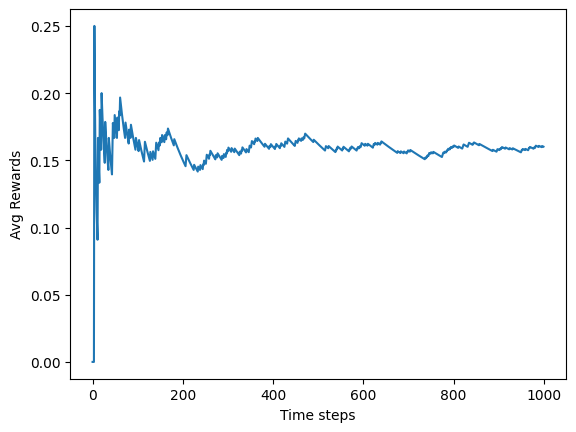

In [ ]:
bandit = Bandit(2)
agent = EpsilonGreedyAgent(0.1, 2, bandit.binaryBanditA)
Q, R = agent.epsilon_greedy()
print("Estimated action values (Qt(a)):")
print(Q)
print("Average rewards recieved:")
print(R)
plt.plot(R)
plt.ylabel("Avg Rewards")
plt.xlabel("Time steps")

2. **For binaryBanditB**

Estimated action values (Qt(a)):
[0.8004246284501062, 0.897727272727273]
Average rewards recieved:
[0, 1.0, 0.5, 0.33333333333333337, 0.5, 0.6, 0.6666666666666666, 0.7142857142857143, 0.75, 0.7777777777777778, 0.8, 0.8181818181818182, 0.8333333333333334, 0.7692307692307693, 0.7142857142857143, 0.6666666666666666, 0.625, 0.6470588235294118, 0.6666666666666667, 0.6842105263157895, 0.7000000000000001, 0.7142857142857143, 0.7272727272727273, 0.7391304347826088, 0.7500000000000001, 0.7600000000000001, 0.7307692307692308, 0.7407407407407408, 0.7500000000000001, 0.7586206896551725, 0.7666666666666667, 0.7741935483870969, 0.7812500000000001, 0.787878787878788, 0.7941176470588236, 0.8, 0.8055555555555556, 0.8108108108108109, 0.8157894736842106, 0.8205128205128206, 0.8250000000000001, 0.8048780487804879, 0.8095238095238095, 0.7906976744186046, 0.7727272727272727, 0.7777777777777778, 0.782608695652174, 0.7872340425531915, 0.7916666666666667, 0.7755102040816327, 0.7600000000000001, 0.7647058823529

Text(0.5, 0, 'Time steps')

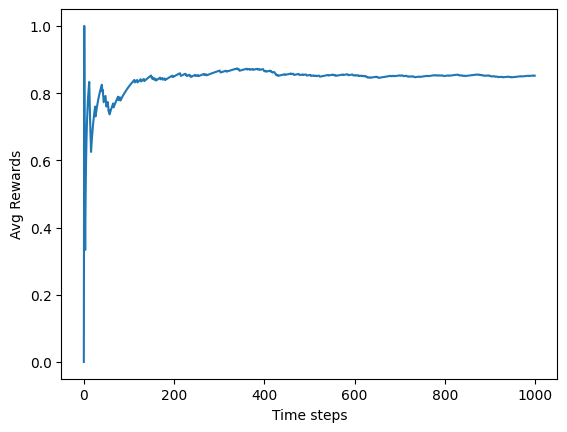

In [ ]:
bandit = Bandit(2)
agent = EpsilonGreedyAgent(0.1, 2, bandit.binaryBanditB)
Q, R = agent.epsilon_greedy()
print("Estimated action values (Qt(a)):")
print(Q)
print("Average rewards recieved:")
print(R)
plt.plot(R)
plt.ylabel("Avg Rewards")
plt.xlabel("Time steps")

# **Problem 2**

Estimated action values (Qt(a)):
[0.8124764763613009, 0.6630219970080306, 1.028971578199775, 0.8566228221180829, 0.7882412070179275, 0.7639451463349844, 0.8901721775673133, 0.8542042389403504, 0.8668325920145682, 0.9391667113230612]
Average rewards recieved:
[0, 1.0042381750722076, 1.0068669771178058, 1.011677857361209, 1.007421395130377, 1.0130087885475043, 1.0161327901309127, 1.0123593354091152, 1.0110338993218362, 1.0091564810558697, 1.0130852015995495, 1.0148900604012223, 1.0073719918099187, 1.0104850562091823, 1.0127036544308703, 1.014246174962936, 1.017084784092162, 1.0153726136828085, 1.0098223616431783, 1.011486060993053, 1.009778316114537, 1.0119484390104143, 1.0135398829155087, 1.01498736465396, 1.0163603385299924, 1.014829415154872, 1.0161455007854248, 1.0149289761988973, 1.0145587214992235, 1.0133657779820726, 1.0103232720297748, 1.010084501925583, 1.0075647716169551, 1.0070914692660164, 1.0065732114896362, 1.0079853653044348, 1.0073890047837315, 1.0075680026484297, 1.00759

Text(0.5, 0, 'Time steps')

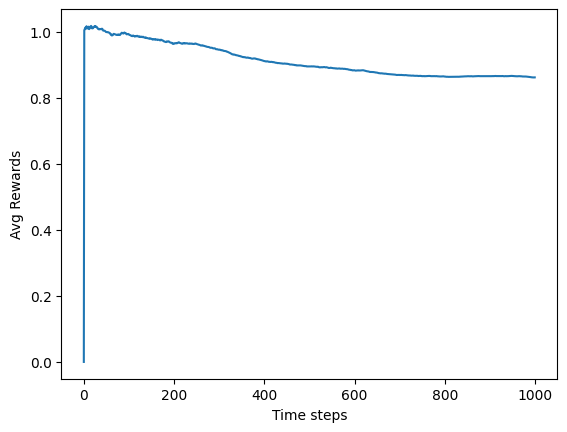

In [ ]:
bandit = Bandit(10)
epsilonGreedyAgent = EpsilonGreedyAgent(0.1, 10, bandit.nonStatBandit)
Q, R = epsilonGreedyAgent.epsilon_greedy()
print("Estimated action values (Qt(a)):")
print(Q)
print("Average rewards recieved:")
print(R)
plt.plot(R)
plt.ylabel("Avg Rewards")
plt.xlabel("Time steps")

# **Problem 3**

Estimated values:  [1.2168955790547358, 0.598099264197583, 0.9106631589016144, 0.8070340910043976, 1.2034857577123665, 0.9557129559737346, 0.4100553463118356, 0.3505281037025174, 1.3717235515681214, 1.1028307424267758]
Estimated action values (Qt(a)):
[1.2168955790547358, 0.598099264197583, 0.9106631589016144, 0.8070340910043976, 1.2034857577123665, 0.9557129559737346, 0.4100553463118356, 0.3505281037025174, 1.3717235515681214, 1.1028307424267758]
Average rewards recieved:
[0, 0.9826415227707642, 0.8769810106445042, 0.8592250447014358, 0.8181296883019911, 0.85785982355292, 0.832306086537512, 0.811495904617041, 0.796953342230696, 0.7978476062661651, 0.7869886510855851, 0.8182633041216668, 0.8360947259113161, 0.8136851498446638, 0.7939275821041001, 0.8071944518321271, 0.8009482973303134, 0.7996066876134845, 0.7918518749289959, 0.7920539261853217, 0.792818900344104, 0.8023892533845972, 0.7957852944177675, 0.7976078845178125, 0.8061301567069123, 0.8067908915373802, 0.8160945037038145, 0.80

Text(0.5, 0, 'Time steps')

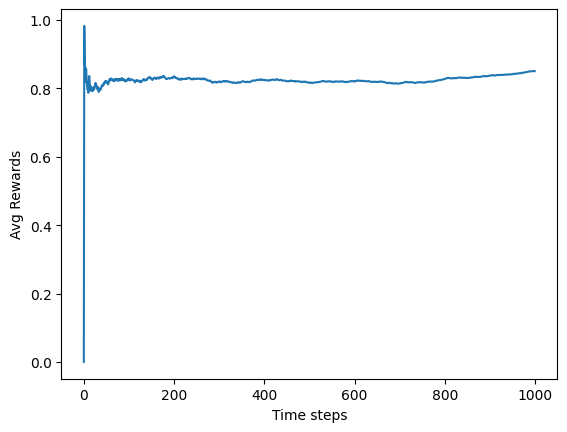

In [ ]:
Q, R = epsilonGreedyAgent.modified_epsilon_greedy(0.7)
print("Estimated values: ", Q)
print("Estimated action values (Qt(a)):")
print(Q)
print("Average rewards recieved:")
print(R)
plt.plot(R)
plt.ylabel("Avg Rewards")
plt.xlabel("Time steps")